In [ ]:
# !pip install onedrivesdk


In [ ]:
# !curl https://rclone.org/install.sh | sudo bash
# !rclone config

# # Once configured, mount OneDrive
# !rclone --vfs-cache-mode writes mount onedrive: /content/onedrive


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Import the necesseries libraries

In [2]:
import os
import numpy as np
import pandas as pd
import librosa
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import matplotlib.pyplot as plt

# Load or bring up the dataset

In [3]:

# Load the Excel metadata
df = pd.read_excel('/content/drive/MyDrive/music/AI Music Files Metadata 10k(1).xlsx')


In [4]:
df.head()

,Name,Song,Artist,Popularity,Album,Album Date,Time,BPM,Genre,Sub Genre,...,Time Signature,Album Label,Camelot,AM Genre,AM Sub Genre,AM Category,Tempo,Vocal Type,File Name,Unnamed: 29
0,(G)I-DLE - I Want That,I Want That,(G)I-DLE,62,HEAT,2023-10-05 00:00:00,02:51:00,120,Pop,k-pop girl group,...,4,CUBE ENTERTAINMENT INC./88rising Music,5A,Korean/Pop,0,2023 Hits,Mid Up,Vocal - Female,(G)I-DLE - I Want That.m4a,(G)I-DLE - I Want That
1,(G)I-DLE - Nxde,Nxde,(G)I-DLE,74,I love,2022-10-17 00:00:00,02:58:00,136,Pop,k-pop girl group,...,4,Cube Entertainment,9A,World/Pop,0,2022 Hits,Mid,Vocal - Female,(G)I-DLE - Nxde.m4a,(G)I-DLE - Nxde
2,(G)I-DLE - TOMBOY,TOMBOY,(G)I-DLE,75,I NEVER DIE,2022-03-14 00:00:00,02:54:00,124,Pop,k-pop girl group,...,4,Cube Entertainment,12A,Korean/Pop,0,K-Pop,Mid Up,Vocal - Female,(G)I-DLE - TOMBOY.mp3,(G)I-DLE - TOMBOY
3,[ocean jams] - Bummer,Bummer,[ocean jams],24,Horizons,2019-06-28 00:00:00,02:39:00,80,Electronic,lo-fi beats,...,4,Epidemic Sound,7A,Electronic,Lo-Fi,Lo-Fi,Mid,Instrumental,[ocean jams] - Bummer.mp3,[ocean jams] - Bummer
4,101 Strings Orchestra - A Bed For Two,A Bed for Two,101 Strings Orchestra,1,The Soul of Greece (Remastered from the Origin...,1966-01-01 00:00:00,03:08:00,117,Easy listening,easy listening,...,4,Alshire,7B,World/Italy,Traditional,Traditional Italian,Mid,Instrumental,101 Strings Orchestra - A Bed For Two.M4a,101 Strings Orchestra - A Bed For Two


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10803 entries, 0 to 10802
Data columns (total 30 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Name            10803 non-null  object
 1   Song            10803 non-null  object
 2   Artist          10803 non-null  object
 3   Popularity      10803 non-null  int64 
 4   Album           10797 non-null  object
 5   Album Date      10803 non-null  object
 6   Time            10803 non-null  object
 7   BPM             10803 non-null  int64 
 8   Genre           8916 non-null   object
 9   Sub Genre       8992 non-null   object
 10  Dance           10803 non-null  object
 11  Energy          10803 non-null  int64 
 12  Acoustic        10803 non-null  int64 
 13  Instrumental    10803 non-null  int64 
 14  Happy           10803 non-null  int64 
 15  Speech          10803 non-null  int64 
 16  Live            10803 non-null  int64 
 17  Loud            10803 non-null  int64 
 18  Key   

In [6]:
# checking missing values
df.isnull().sum()

,0
Name,0
Song,0
Artist,0
Popularity,0
Album,6
Album Date,0
Time,0
BPM,0
Genre,1887
Sub Genre,1811


In [7]:
df.drop(['Unnamed: 29'], axis=1, inplace=True)

In [8]:
df.dropna(inplace=True)

In [9]:
df.isnull().sum()

,0
Name,0
Song,0
Artist,0
Popularity,0
Album,0
Album Date,0
Time,0
BPM,0
Genre,0
Sub Genre,0


In [10]:
df

,Name,Song,Artist,Popularity,Album,Album Date,Time,BPM,Genre,Sub Genre,...,Language,Time Signature,Album Label,Camelot,AM Genre,AM Sub Genre,AM Category,Tempo,Vocal Type,File Name
0,(G)I-DLE - I Want That,I Want That,(G)I-DLE,62,HEAT,2023-10-05 00:00:00,02:51:00,120,Pop,k-pop girl group,...,English,4,CUBE ENTERTAINMENT INC./88rising Music,5A,Korean/Pop,0,2023 Hits,Mid Up,Vocal - Female,(G)I-DLE - I Want That.m4a
1,(G)I-DLE - Nxde,Nxde,(G)I-DLE,74,I love,2022-10-17 00:00:00,02:58:00,136,Pop,k-pop girl group,...,Korean/English,4,Cube Entertainment,9A,World/Pop,0,2022 Hits,Mid,Vocal - Female,(G)I-DLE - Nxde.m4a
2,(G)I-DLE - TOMBOY,TOMBOY,(G)I-DLE,75,I NEVER DIE,2022-03-14 00:00:00,02:54:00,124,Pop,k-pop girl group,...,Korean,4,Cube Entertainment,12A,Korean/Pop,0,K-Pop,Mid Up,Vocal - Female,(G)I-DLE - TOMBOY.mp3
19,10cc - The Things We Do For Love,The Things We Do For Love,10cc,66,Deceptive Bends,1977-00-00,03:27:00,107,Rock,"album rock, art rock, classic rock, glam rock,...",...,English,4,EMI,3B,Rock,Progressive Pop,Classic Rock,Mid,Vocal - Male,10cc - The Things We Do For Love.M4a
23,112 - Peaches & Cream,Peaches & Cream,112,64,Part III,2001-00-00,03:13:00,204,undefined,"atl hip hop, boy band, contemporary r&b, hip p...",...,English,4,Rhino Atlantic,9A,R&B,0,Hip Hop,Mid Up,Vocal - Male,112 - Peaches & Cream.Mp3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10798,Zubeen Garg - Oh My God,Oh My God,Zubeen Garg,20,Oh My God,2012-08-24 00:00:00,01:28:00,138,Pop,assamese pop,...,0,4,T-Series,1B,Soundtrack/Bollywood,Bhajan,0,Mid,Vocal,Zubeen Garg - Oh My God.mp3
10799,Zuco 103 - Q Baiano,Q Baiano,Zuco 103,37,"One Down, One Up",2003-10-20 00:00:00,02:47:00,114,"Jazz, Latin","electro jazz, sambass",...,English,4,Zuco Sound,2A,Nu Jazz,0,Nu Jazz,Mid Up,Vocal - Female,Zuco 103 - Q Baiano.Mp3
10800,ZZ Top - I Thank You,I Thank You,ZZ Top,43,Deguello,1979-11-01 00:00:00,03:24:00,110,Rock,"album rock, blues rock, classic rock, hard roc...",...,English,4,BMG Rights Management (US) LLC,9B,Blues Rock,Texas Blues,Classic Rock,Mid,Vocal - Male,ZZ Top - I Thank You.m4a
10801,ZZ Top - She Loves My Automobile,She Loves My Automobile,ZZ Top,36,Deguello,1979-11-01 00:00:00,02:23:00,130,Rock,"album rock, blues rock, classic rock, hard roc...",...,English,3,BMG Rights Management (US) LLC,10B,Blues Rock,Texas Blues,Classic Rock,Mid Up,Vocal - Male,ZZ Top - She Loves My Automobile.m4a


# Extract the music audio features

In [11]:

# Feature extraction function
def extract_features(audio_path):
    try:
        y, sr = librosa.load(audio_path, duration=30)
        mfccs = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13).T, axis=0)
        chroma = np.mean(librosa.feature.chroma_stft(y=y, sr=sr).T, axis=0)
        mel = np.mean(librosa.feature.melspectrogram(y=y, sr=sr).T, axis=0)
        return mfccs, chroma, mel
    except FileNotFoundError:
        print(f"File not found: {audio_path}")
        return None, None, None

In [12]:
# Extract features from each audio file
df['features'] = df['File Name'].apply(lambda x: extract_features(f'/content/drive/MyDrive/Music Classification/All Music Files/{x}'))

# Split the features into separate columns and drop rows with missing features
df['mfcc'] = df['features'].apply(lambda x: x[0] if x is not None else None)
df['chroma'] = df['features'].apply(lambda x: x[1] if x is not None else None)
df['mel'] = df['features'].apply(lambda x: x[2] if x is not None else None)
df = df.dropna(subset=['mfcc', 'chroma', 'mel'])
df = df.drop(columns=['features'])

<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packa

File not found: /content/drive/MyDrive/Music Classification/All Music Files/48th St. Collective - Just Like Heaven.Mp3
File not found: /content/drive/MyDrive/Music Classification/All Music Files/48th St. Collective - Just Like Heaven.Mp3


<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packa

File not found: /content/drive/MyDrive/Music Classification/All Music Files/A R I Z O N A - Problems.m4a
File not found: /content/drive/MyDrive/Music Classification/All Music Files/A R I Z O N A - Problems.m4a
File not found: /content/drive/MyDrive/Music Classification/All Music Files/A.R. Rahman - Whistlu Whistlu Whistluma.mp3
File not found: /content/drive/MyDrive/Music Classification/All Music Files/Aakanksha Sharma - Raat Ke Saaye Tale.mp3


<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packa

File not found: /content/drive/MyDrive/Music Classification/All Music Files/Abhijeet Srivastava - Happy Birthday.mp3


<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packa

File not found: /content/drive/MyDrive/Music Classification/All Music Files/Ajay Warriar - Akashadalli.mp3
File not found: /content/drive/MyDrive/Music Classification/All Music Files/Ajay Warriar - Nanna Hetthavalu.mp3


<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packa

File not found: /content/drive/MyDrive/Music Classification/All Music Files/Ali Azmat - Main To Yahin Hoon Lekin.mp3


<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packa

File not found: /content/drive/MyDrive/Music Classification/All Music Files/Ali Noor - Girha.mp3


<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packa

File not found: /content/drive/MyDrive/Music Classification/All Music Files/Amazonics - I Wanna Be Your Boyfriend.Mp3
File not found: /content/drive/MyDrive/Music Classification/All Music Files/Amazonics - I Wanna Be Your Boyfriend.Mp3


<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packa

File not found: /content/drive/MyDrive/Music Classification/All Music Files/Amit Kumar - Balle Balle.mp3
File not found: /content/drive/MyDrive/Music Classification/All Music Files/Amit Trivedi - Beautiful.mp3
File not found: /content/drive/MyDrive/Music Classification/All Music Files/Amit Trivedi - Tommy Gun.mp3
File not found: /content/drive/MyDrive/Music Classification/All Music Files/Ammy Virk - Pasand Jatt Di.mp3


<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


File not found: /content/drive/MyDrive/Music Classification/All Music Files/Amrit Maan - Blood Wich Tu.mp3


<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packa

File not found: /content/drive/MyDrive/Music Classification/All Music Files/Anakelly - Under My Thumb.Mp3
File not found: /content/drive/MyDrive/Music Classification/All Music Files/Anakelly - Under My Thumb.Mp3


<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packa

File not found: /content/drive/MyDrive/Music Classification/All Music Files/Anirudh Ravichander - Sachin Tendulkar Back Bencher.mp3
File not found: /content/drive/MyDrive/Music Classification/All Music Files/Anirudh Ravichander - Sanchari.mp3


<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packa

File not found: /content/drive/MyDrive/Music Classification/All Music Files/Ann Peebles - I Can’T Stand The Rain.mp3


<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packa

File not found: /content/drive/MyDrive/Music Classification/All Music Files/Anuradha Bhat - Hoge Jana Mari.mp3
File not found: /content/drive/MyDrive/Music Classification/All Music Files/Anuradha Bhat - Krishna Nee.mp3
File not found: /content/drive/MyDrive/Music Classification/All Music Files/Anuradha Bhat - Mareyalagadha Mechidha.mp3
File not found: /content/drive/MyDrive/Music Classification/All Music Files/Anuradha Bhat - Preethi Nee Nanna.mp3
File not found: /content/drive/MyDrive/Music Classification/All Music Files/Anuradha Bhat - Preethi Soluthide.mp3


<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packa

File not found: /content/drive/MyDrive/Music Classification/All Music Files/Anushka Manchanda - Meri Aadat Mera Hissa.mp3
File not found: /content/drive/MyDrive/Music Classification/All Music Files/Aparna Nandan - Nuvvu Levanna.mp3


<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packa

File not found: /content/drive/MyDrive/Music Classification/All Music Files/Arijit Singh - Binte Dil.mp3
File not found: /content/drive/MyDrive/Music Classification/All Music Files/Arijit Singh - Chota Sa Fasana.mp3


<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packa

File not found: /content/drive/MyDrive/Music Classification/All Music Files/Armaan Malik - Jab Tak.mp3
File not found: /content/drive/MyDrive/Music Classification/All Music Files/Armaan Malik - Shukar Manavaan.mp3
File not found: /content/drive/MyDrive/Music Classification/All Music Files/Armaan Malik - Uff Yeh Noor.mp3
File not found: /content/drive/MyDrive/Music Classification/All Music Files/Armaan Malik - Waqt Ke Jungle.mp3


<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packa

File not found: /content/drive/MyDrive/Music Classification/All Music Files/Asees Kaur - Hui Malang.mp3


<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packa

File not found: /content/drive/MyDrive/Music Classification/All Music Files/Asura - Idi Varanasi.mp3
File not found: /content/drive/MyDrive/Music Classification/All Music Files/Atif Aslam - Chalte Chalte.mp3


<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packa

File not found: /content/drive/MyDrive/Music Classification/All Music Files/Ayushmann Khurrana - Maafi.mp3


<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packa

File not found: /content/drive/MyDrive/Music Classification/All Music Files/Banda Do Sul - Evacuate The Dancefloor.Mp3
File not found: /content/drive/MyDrive/Music Classification/All Music Files/Banda Do Sul - Evacuate The Dancefloor.Mp3
File not found: /content/drive/MyDrive/Music Classification/All Music Files/Bappi Lahiri - Dharpakad.mp3


<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


File not found: /content/drive/MyDrive/Music Classification/All Music Files/Barbara Mendes - Call Me.Mp3
File not found: /content/drive/MyDrive/Music Classification/All Music Files/Barbara Mendes - Call Me.Mp3


<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packa

File not found: /content/drive/MyDrive/Music Classification/All Music Files/Beenie Man & Fambo - I'm Drinking-rum & Red Bull.mp3


<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packa

File not found: /content/drive/MyDrive/Music Classification/All Music Files/Bellestar - Love Will Tear Us Apart.Mp3
File not found: /content/drive/MyDrive/Music Classification/All Music Files/Bellestar - Love Will Tear Us Apart.Mp3
File not found: /content/drive/MyDrive/Music Classification/All Music Files/Bellestar - Paranoid.Mp3
File not found: /content/drive/MyDrive/Music Classification/All Music Files/Bellestar - Paranoid.Mp3


<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packa

File not found: /content/drive/MyDrive/Music Classification/All Music Files/Benny Dayal - Comosava Paris.mp3


<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packa

File not found: /content/drive/MyDrive/Music Classification/All Music Files/Bhoomi Trivedi - Bahne Dey.mp3


<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packa

File not found: /content/drive/MyDrive/Music Classification/All Music Files/Billie Holiday - Am I Blue (2).m4a


<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packa

File not found: /content/drive/MyDrive/Music Classification/All Music Files/Billie Holiday - Hello, My Darling (1).m4a


<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packa

File not found: /content/drive/MyDrive/Music Classification/All Music Files/Blaaze - Prema Thokka Tholu.mp3


<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packa

File not found: /content/drive/MyDrive/Music Classification/All Music Files/Bo Diddley - Who Do You Love.M4a
File not found: /content/drive/MyDrive/Music Classification/All Music Files/Bo Diddley - Who Do You Love.M4a


<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packa

File not found: /content/drive/MyDrive/Music Classification/All Music Files/Bob Marley & The Wailers - No Symphaty.m4a


<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


File not found: /content/drive/MyDrive/Music Classification/All Music Files/Bob Marley & the Wailers - Stir It Up [Live Version].m4a


<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


File not found: /content/drive/MyDrive/Music Classification/All Music Files/Bob Marley & the Wailers - Top Rankin'.m4a


<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packa

File not found: /content/drive/MyDrive/Music Classification/All Music Files/Bobo Shashi - Ye Mantramo.mp3


<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


File not found: /content/drive/MyDrive/Music Classification/All Music Files/Bombay Jayashri - Thatra Gandhavathi Pruthvi.mp3


<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packa

File not found: /content/drive/MyDrive/Music Classification/All Music Files/Brinda - Naa Kale Kalai.mp3


<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packa

File not found: /content/drive/MyDrive/Music Classification/All Music Files/Cassandra Beck - Material Girl.M4a
File not found: /content/drive/MyDrive/Music Classification/All Music Files/Cassandra Beck - Material Girl.M4a


<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packa

File not found: /content/drive/MyDrive/Music Classification/All Music Files/Chandan Shetty - Banda Banda Babru.mp3
File not found: /content/drive/MyDrive/Music Classification/All Music Files/Chandan Shetty - Maga Baaro.mp3


<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packa

File not found: /content/drive/MyDrive/Music Classification/All Music Files/Chetan Sosca - Gutagi Kelli.mp3
File not found: /content/drive/MyDrive/Music Classification/All Music Files/Chethan Naik - E Erabaradhe.mp3
File not found: /content/drive/MyDrive/Music Classification/All Music Files/Chethan Naik - Maaya Kannadi.mp3


<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


File not found: /content/drive/MyDrive/Music Classification/All Music Files/Chinmayi - Yenti Yenti.mp3
File not found: /content/drive/MyDrive/Music Classification/All Music Files/Chinna Ponnu - Mirchi.mp3


<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packa

File not found: /content/drive/MyDrive/Music Classification/All Music Files/Chorus - Dharmapraja.mp3
File not found: /content/drive/MyDrive/Music Classification/All Music Files/Chorus - Nathathra.mp3
File not found: /content/drive/MyDrive/Music Classification/All Music Files/Chorus - Shankara Vijayam.mp3
File not found: /content/drive/MyDrive/Music Classification/All Music Files/Chorus - Veda Thandavam.mp3
File not found: /content/drive/MyDrive/Music Classification/All Music Files/Chorus - Yama Slokam.mp3


<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packa

File not found: /content/drive/MyDrive/Music Classification/All Music Files/Coleman Hell - Fireproof.Mp3
File not found: /content/drive/MyDrive/Music Classification/All Music Files/Coleman Hell - Fireproof.Mp3


<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packa

File not found: /content/drive/MyDrive/Music Classification/All Music Files/Dilpreet Dhillon - Morni.mp3


<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packa

File not found: /content/drive/MyDrive/Music Classification/All Music Files/Dinah Washington - Invitation (1).m4a


<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packa

File not found: /content/drive/MyDrive/Music Classification/All Music Files/Dinker Kalvala - Dawath.mp3
File not found: /content/drive/MyDrive/Music Classification/All Music Files/Dinker Kalvala - Vethiki Vethiki.mp3


<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packa

File not found: /content/drive/MyDrive/Music Classification/All Music Files/Divya Kumar - Kahani Baaki Hai.mp3
File not found: /content/drive/MyDrive/Music Classification/All Music Files/Divya Kumar - Moorakh.mp3
File not found: /content/drive/MyDrive/Music Classification/All Music Files/Divya Kumar - Soni Kudi.mp3
File not found: /content/drive/MyDrive/Music Classification/All Music Files/Divya Kumar - Soni Kudi.mp3


<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


File not found: /content/drive/MyDrive/Music Classification/All Music Files/DJ Style - Clocks.Mp3
File not found: /content/drive/MyDrive/Music Classification/All Music Files/DJ Style - Clocks.Mp3


<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packa

File not found: /content/drive/MyDrive/Music Classification/All Music Files/Dual Sessions - Radioactive.Mp3
File not found: /content/drive/MyDrive/Music Classification/All Music Files/Dual Sessions - Radioactive.Mp3
File not found: /content/drive/MyDrive/Music Classification/All Music Files/Dualbox - Is This Love.Mp3
File not found: /content/drive/MyDrive/Music Classification/All Music Files/Dualbox - Is This Love.Mp3
File not found: /content/drive/MyDrive/Music Classification/All Music Files/Dualbox - Miracle Man.Mp3
File not found: /content/drive/MyDrive/Music Classification/All Music Files/Dualbox - Miracle Man.Mp3


<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packa

File not found: /content/drive/MyDrive/Music Classification/All Music Files/Edu Lobo - Viola Fora De Moda (1).M4a


<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packa

File not found: /content/drive/MyDrive/Music Classification/All Music Files/Ella Fitzgerald - I Concentrate On You (1).m4a


<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packa

File not found: /content/drive/MyDrive/Music Classification/All Music Files/Elza Soares - Mas Que Nada (1).M4a


<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packa

File not found: /content/drive/MyDrive/Music Classification/All Music Files/Eve St. Jones - Blackbird.Mp3
File not found: /content/drive/MyDrive/Music Classification/All Music Files/Eve St. Jones - Blackbird.Mp3
File not found: /content/drive/MyDrive/Music Classification/All Music Files/Eve St. Jones - Blame It On The Boogie.M4a
File not found: /content/drive/MyDrive/Music Classification/All Music Files/Eve St. Jones - Blame It On The Boogie.M4a


<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packa

File not found: /content/drive/MyDrive/Music Classification/All Music Files/Francoise Sanders - I Will.Mp3
File not found: /content/drive/MyDrive/Music Classification/All Music Files/Francoise Sanders - I Will.Mp3
File not found: /content/drive/MyDrive/Music Classification/All Music Files/Francoise Sanders - In Between Days.Mp3
File not found: /content/drive/MyDrive/Music Classification/All Music Files/Francoise Sanders - In Between Days.Mp3


<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packa

File not found: /content/drive/MyDrive/Music Classification/All Music Files/Future Soundscapes - Roxanne.Mp3
File not found: /content/drive/MyDrive/Music Classification/All Music Files/Future Soundscapes - Roxanne.Mp3


<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packa

File not found: /content/drive/MyDrive/Music Classification/All Music Files/General Soundbwoy - Hello.Mp3
File not found: /content/drive/MyDrive/Music Classification/All Music Files/General Soundbwoy - Hello.Mp3


<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packa

File not found: /content/drive/MyDrive/Music Classification/All Music Files/Gippy Grewal - Fuel.mp3
File not found: /content/drive/MyDrive/Music Classification/All Music Files/Gippy Grewal - Phulkari.mp3


<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packa

File not found: /content/drive/MyDrive/Music Classification/All Music Files/Gopi Sundar - Kanureppala Kaalam.mp3


<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packa

File not found: /content/drive/MyDrive/Music Classification/All Music Files/Gurnam Bhullar - Lanedarniye.mp3
File not found: /content/drive/MyDrive/Music Classification/All Music Files/Guru Randhawa - Outfit.mp3


<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packa

File not found: /content/drive/MyDrive/Music Classification/All Music Files/Haricharan - Chandamama.mp3
File not found: /content/drive/MyDrive/Music Classification/All Music Files/Haricharan - Ee Mussanje.mp3
File not found: /content/drive/MyDrive/Music Classification/All Music Files/Haricharan - Mullapoove.mp3
File not found: /content/drive/MyDrive/Music Classification/All Music Files/Haricharan - Punnami Vennelake.mp3
File not found: /content/drive/MyDrive/Music Classification/All Music Files/Haricharan - Vekuvala.mp3
File not found: /content/drive/MyDrive/Music Classification/All Music Files/Hariharan - Sapdha Gunakam.mp3
File not found: /content/drive/MyDrive/Music Classification/All Music Files/Hariharan - Sivoham.mp3
File not found: /content/drive/MyDrive/Music Classification/All Music Files/Harish Raghavendra - Idhi Rana Rangama.mp3
File not found: /content/drive/MyDrive/Music Classification/All Music Files/Harrdy Sandhu - Little Little.mp3


<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packa

File not found: /content/drive/MyDrive/Music Classification/All Music Files/Harshdeep Kaur - Yaadien Gatthri Mein.mp3


<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packa

File not found: /content/drive/MyDrive/Music Classification/All Music Files/Hiphop Tamizha - Paisa Note.mp3


<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packa

File not found: /content/drive/MyDrive/Music Classification/All Music Files/Hymath Mohammed - O Lakshyam.mp3
File not found: /content/drive/MyDrive/Music Classification/All Music Files/Hypnomusic - Maggie May.m4a
File not found: /content/drive/MyDrive/Music Classification/All Music Files/Hypnomusic - Maggie May.m4a


<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packa

File not found: /content/drive/MyDrive/Music Classification/All Music Files/Icona Pop - Feels In My Body.m4a
File not found: /content/drive/MyDrive/Music Classification/All Music Files/Icona Pop - Feels In My Body.m4a


<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packa

File not found: /content/drive/MyDrive/Music Classification/All Music Files/Ilaiyaraaja - Kalushitham.mp3


<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packa

File not found: /content/drive/MyDrive/Music Classification/All Music Files/Jamie Lancaster - It Ain't Over 'Til It's Over.m4a
File not found: /content/drive/MyDrive/Music Classification/All Music Files/Jamie Lancaster - It Ain't Over 'Til It's Over.m4a


<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packa

File not found: /content/drive/MyDrive/Music Classification/All Music Files/Jassie Gift - Anaganaga.mp3


<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packa

File not found: /content/drive/MyDrive/Music Classification/All Music Files/Jingo - Lucky Star.Mp3
File not found: /content/drive/MyDrive/Music Classification/All Music Files/Jingo - Lucky Star.Mp3


<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packa

File not found: /content/drive/MyDrive/Music Classification/All Music Files/Joi Barua - Dusokute.mp3
File not found: /content/drive/MyDrive/Music Classification/All Music Files/Joji - Your Man.m4a
File not found: /content/drive/MyDrive/Music Classification/All Music Files/Joji - Your Man.m4a


<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packa

File not found: /content/drive/MyDrive/Music Classification/All Music Files/Jonita Gandhi - Woh Tho Yahin Hai Lekin.mp3


<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packa

File not found: /content/drive/MyDrive/Music Classification/All Music Files/Jordan Sandhu - Black Pagg.mp3
File not found: /content/drive/MyDrive/Music Classification/All Music Files/Jordan Sandhu - Shaukeen Jatt.mp3
File not found: /content/drive/MyDrive/Music Classification/All Music Files/Jordan Sandhu - Shaukeen Jatt.mp3


<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packa

File not found: /content/drive/MyDrive/Music Classification/All Music Files/Jubin Nautiyal - Tinka.mp3


<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packa

File not found: /content/drive/MyDrive/Music Classification/All Music Files/Justin Prabhakaran - Sei Un Angelo.mp3


<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packa

File not found: /content/drive/MyDrive/Music Classification/All Music Files/Jyotica Tangri - Mujhe Ishq Sikha Karke.mp3


<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


File not found: /content/drive/MyDrive/Music Classification/All Music Files/Kailash Kher - Chinnamma Kalyanam.mp3
File not found: /content/drive/MyDrive/Music Classification/All Music Files/Kailash Kher - Gange Jayamu.mp3
File not found: /content/drive/MyDrive/Music Classification/All Music Files/Kailash Kher - Jal Rahin Hain.mp3
File not found: /content/drive/MyDrive/Music Classification/All Music Files/Kailash Kher - Nee Choopula.mp3
File not found: /content/drive/MyDrive/Music Classification/All Music Files/Kailash Kher - Onduralli Obba Yajamana.mp3
File not found: /content/drive/MyDrive/Music Classification/All Music Files/Kailash Kher - Silaka Silaka.mp3
File not found: /content/drive/MyDrive/Music Classification/All Music Files/Kailash Kher - Tum Miley Ho.mp3


<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


File not found: /content/drive/MyDrive/Music Classification/All Music Files/Kalpana - Thillana.mp3
File not found: /content/drive/MyDrive/Music Classification/All Music Files/Kamal Khan - Rab Ne Milaya.mp3


<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packa

File not found: /content/drive/MyDrive/Music Classification/All Music Files/Karan Sehmbi - Photo.mp3


<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packa

File not found: /content/drive/MyDrive/Music Classification/All Music Files/Karthik - Kallalo Vunna Prema.mp3
File not found: /content/drive/MyDrive/Music Classification/All Music Files/Karthik - Minsarey Minsarey.mp3
File not found: /content/drive/MyDrive/Music Classification/All Music Files/Karthik - Oru Thooval.mp3
File not found: /content/drive/MyDrive/Music Classification/All Music Files/Karthik - Po Pove.mp3
File not found: /content/drive/MyDrive/Music Classification/All Music Files/Karthik - Rab Di.mp3
File not found: /content/drive/MyDrive/Music Classification/All Music Files/Karthik - Sivam.mp3
File not found: /content/drive/MyDrive/Music Classification/All Music Files/Karthik - Tara.mp3
File not found: /content/drive/MyDrive/Music Classification/All Music Files/Karthik Rodriguez - Kannu Kotti.mp3


<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packa

File not found: /content/drive/MyDrive/Music Classification/All Music Files/Lee Avril - Synchronicity.Mp3
File not found: /content/drive/MyDrive/Music Classification/All Music Files/Lee Avril - Synchronicity.Mp3


<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packa

File not found: /content/drive/MyDrive/Music Classification/All Music Files/Leon James - Ninna Monnalaage.mp3


<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packa

File not found: /content/drive/MyDrive/Music Classification/All Music Files/Luca Schreiner - Over You.m4a
File not found: /content/drive/MyDrive/Music Classification/All Music Files/Luca Schreiner - Over You.m4a


<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packa

File not found: /content/drive/MyDrive/Music Classification/All Music Files/Lucky Ali - Ya Husain.mp3


<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packa

File not found: /content/drive/MyDrive/Music Classification/All Music Files/Malavika - Sri Krishnaraya.mp3


<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packa

File not found: /content/drive/MyDrive/Music Classification/All Music Files/Manan Bhardwaj - Nichod Dunga.mp3
File not found: /content/drive/MyDrive/Music Classification/All Music Files/Manasa Holla - Hogadiru Hogadiru.mp3
File not found: /content/drive/MyDrive/Music Classification/All Music Files/Mandy Jones - Paperback Writer.M4a
File not found: /content/drive/MyDrive/Music Classification/All Music Files/Mandy Jones - Paperback Writer.M4a


<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


File not found: /content/drive/MyDrive/Music Classification/All Music Files/Manikka Vinayagam - Minchula Saagide.mp3
File not found: /content/drive/MyDrive/Music Classification/All Music Files/Manisha Eerabathini - Lokamantha Okkasari Maare.mp3
File not found: /content/drive/MyDrive/Music Classification/All Music Files/Manisha Eerabathini - Nee Romba Romba.mp3
File not found: /content/drive/MyDrive/Music Classification/All Music Files/Manisha Eerabathini - Telipo Telipo.mp3
File not found: /content/drive/MyDrive/Music Classification/All Music Files/Mannat Noor - Multan.mp3
File not found: /content/drive/MyDrive/Music Classification/All Music Files/Mannat Noor - Sheesha.mp3
File not found: /content/drive/MyDrive/Music Classification/All Music Files/Mano - Odalu Mannanta.mp3


<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packa

File not found: /content/drive/MyDrive/Music Classification/All Music Files/Marianna Leporace - Bizarre Love Triangle.m4a
File not found: /content/drive/MyDrive/Music Classification/All Music Files/Marianna Leporace - Bizarre Love Triangle.m4a
File not found: /content/drive/MyDrive/Music Classification/All Music Files/Marianna Leporace - If.m4a
File not found: /content/drive/MyDrive/Music Classification/All Music Files/Marianna Leporace - If.m4a


<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packa

File not found: /content/drive/MyDrive/Music Classification/All Music Files/Mellow D - Bhasad.mp3


<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packa

File not found: /content/drive/MyDrive/Music Classification/All Music Files/Mika Singh - Sexy Baliye.mp3


<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packa

File not found: /content/drive/MyDrive/Music Classification/All Music Files/Mohana Bhogaraju - Cheyy Joggingu Jumpingu.mp3
File not found: /content/drive/MyDrive/Music Classification/All Music Files/Mohana Bhogaraju - Neeti Neeti Sukka.mp3
File not found: /content/drive/MyDrive/Music Classification/All Music Files/Mohana Bhogaraju - Yetikokka Poota.mp3


<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packa

File not found: /content/drive/MyDrive/Music Classification/All Music Files/Mukesh - Appikondu Nange Jo Laali.mp3


<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packa

File not found: /content/drive/MyDrive/Music Classification/All Music Files/Nakul Abhyankar - Neenallave.mp3


<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packa

File not found: /content/drive/MyDrive/Music Classification/All Music Files/Narayan Sharma - Kalabeda Kolabeda.mp3
File not found: /content/drive/MyDrive/Music Classification/All Music Files/Narayan Sharma - Yanda Yendati.mp3


<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packa

File not found: /content/drive/MyDrive/Music Classification/All Music Files/Naveen Madhav - Thees Maar Khan.mp3


<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packa

File not found: /content/drive/MyDrive/Music Classification/All Music Files/Neeti Mohan - Naam Hai Mera.mp3


<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


File not found: /content/drive/MyDrive/Music Classification/All Music Files/Neha Kakkar - Gali Gali.mp3


<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packa

File not found: /content/drive/MyDrive/Music Classification/All Music Files/Nikhita Gandhi - Pilla Picture Perfect.mp3
File not found: /content/drive/MyDrive/Music Classification/All Music Files/Nikhita Gandhi - Tan Tan.mp3


<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packa

File not found: /content/drive/MyDrive/Music Classification/All Music Files/Niranj Suresh - Boggu Ganilo.mp3


<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packa

File not found: /content/drive/MyDrive/Music Classification/All Music Files/Os Digitalistas - Heavy.Mp3
File not found: /content/drive/MyDrive/Music Classification/All Music Files/Os Digitalistas - Heavy.Mp3


<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packa

File not found: /content/drive/MyDrive/Music Classification/All Music Files/P. Leela - Sri Janaki Devi.mp3
File not found: /content/drive/MyDrive/Music Classification/All Music Files/P. Leela - Yemito Ee Maya.mp3
File not found: /content/drive/MyDrive/Music Classification/All Music Files/P. Susheela - Ada Janmaku.mp3
File not found: /content/drive/MyDrive/Music Classification/All Music Files/P. Susheela - Baalanura Madanaa.mp3


<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packa

File not found: /content/drive/MyDrive/Music Classification/All Music Files/Papon - Heartquake.mp3


<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


File not found: /content/drive/MyDrive/Music Classification/All Music Files/Parampara Tandon - Padhai Likhai.mp3


<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packa

File not found: /content/drive/MyDrive/Music Classification/All Music Files/Patti Smith - Redondo Beach (1).m4a


<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packa

File not found: /content/drive/MyDrive/Music Classification/All Music Files/Priyadarshini - Mora Vinara.mp3


<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packa

File not found: /content/drive/MyDrive/Music Classification/All Music Files/Raghu Dixit - Kaliyo Nee Kannada.mp3


<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packa

File not found: /content/drive/MyDrive/Music Classification/All Music Files/Raj Pandit - Lagan Lagi.mp3
File not found: /content/drive/MyDrive/Music Classification/All Music Files/Rajesh Krishnan - Novina Butthina Kottu.mp3
File not found: /content/drive/MyDrive/Music Classification/All Music Files/Rajesh Krishnan - Yaaru Illa.mp3


<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


File not found: /content/drive/MyDrive/Music Classification/All Music Files/Ram Sampath - Itemwaale.mp3


<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


File not found: /content/drive/MyDrive/Music Classification/All Music Files/Ranjit Bawa - Att Chukni.mp3
File not found: /content/drive/MyDrive/Music Classification/All Music Files/Ranjit Bawa - Bhangre Pain Ge.mp3
File not found: /content/drive/MyDrive/Music Classification/All Music Files/Ranjit Bawa - End Yaariyaan.mp3


<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packa

File not found: /content/drive/MyDrive/Music Classification/All Music Files/Rita Lee - She Loves You.Mp3
File not found: /content/drive/MyDrive/Music Classification/All Music Files/Rita Lee - She Loves You.Mp3


<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packa

File not found: /content/drive/MyDrive/Music Classification/All Music Files/Robert DeLong - First Person On Earth.m4a
File not found: /content/drive/MyDrive/Music Classification/All Music Files/Robert DeLong - First Person On Earth.m4a


<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packa

File not found: /content/drive/MyDrive/Music Classification/All Music Files/Roll Rida - Kaki Nemali Ke Votu.mp3


<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


File not found: /content/drive/MyDrive/Music Classification/All Music Files/Romy - Zumba.mp3


<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packa

File not found: /content/drive/MyDrive/Music Classification/All Music Files/Roshan Prince - Tan Ho Geya.mp3


<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packa

File not found: /content/drive/MyDrive/Music Classification/All Music Files/S. Janaki - Devatalara.mp3
File not found: /content/drive/MyDrive/Music Classification/All Music Files/S. Janaki - Goranta Deepam.mp3
File not found: /content/drive/MyDrive/Music Classification/All Music Files/S. Janaki - Nee Dannai.mp3
File not found: /content/drive/MyDrive/Music Classification/All Music Files/S. P. Balasubrahmanyam - Loka Maya Bazaru.mp3
File not found: /content/drive/MyDrive/Music Classification/All Music Files/S. P. Balasubrahmanyam - Telipedelaga.mp3


<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packa

File not found: /content/drive/MyDrive/Music Classification/All Music Files/Sachet Tandon - Nazarbattu.mp3
File not found: /content/drive/MyDrive/Music Classification/All Music Files/Sachin - Friendshippina Katheya Kelu.mp3


<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packa

File not found: /content/drive/MyDrive/Music Classification/All Music Files/Salman Ali - Jai He.mp3


<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packa

File not found: /content/drive/MyDrive/Music Classification/All Music Files/Samira Koppikar - Maati Ka Palang.mp3


<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packa

File not found: /content/drive/MyDrive/Music Classification/All Music Files/Sanjith Hegde - Lambodara Loose Aadaa.mp3
File not found: /content/drive/MyDrive/Music Classification/All Music Files/Sanjith Hegde - Life Is Beautiful.mp3
File not found: /content/drive/MyDrive/Music Classification/All Music Files/Sanjith Hegde - London London.mp3
File not found: /content/drive/MyDrive/Music Classification/All Music Files/Sanjith Hegde - Lovve Illade.mp3
File not found: /content/drive/MyDrive/Music Classification/All Music Files/Sanjith Hegde - Neene Neene Neene Sangathi.mp3
File not found: /content/drive/MyDrive/Music Classification/All Music Files/Sanjith Hegde - Oh Vidhiye Kshamisu.mp3
File not found: /content/drive/MyDrive/Music Classification/All Music Files/Sanjith Hegde - Onde Ondhu Baari.mp3
File not found: /content/drive/MyDrive/Music Classification/All Music Files/Sanjith Hegde - Preetiyalli Hogo.mp3
File not found: /content/drive/MyDrive/Music Classification/All Music Files/Santhosh

<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packa

File not found: /content/drive/MyDrive/Music Classification/All Music Files/Sarah Menescal - Lanterna Dos Afogados.Mp3
File not found: /content/drive/MyDrive/Music Classification/All Music Files/Sarah Menescal - Lanterna Dos Afogados.Mp3


<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


File not found: /content/drive/MyDrive/Music Classification/All Music Files/Sarah Menescal - Used To Love Her.Mp3
File not found: /content/drive/MyDrive/Music Classification/All Music Files/Sarah Menescal - Used To Love Her.Mp3


<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packa

File not found: /content/drive/MyDrive/Music Classification/All Music Files/Shaan - Murli Ki Taanon Si.mp3
File not found: /content/drive/MyDrive/Music Classification/All Music Files/Shaan - Take It Easy.mp3
File not found: /content/drive/MyDrive/Music Classification/All Music Files/Shaan - Veenavadini Symphony.mp3


<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


File not found: /content/drive/MyDrive/Music Classification/All Music Files/Shail Hada - Ek Malaal.mp3


<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


File not found: /content/drive/MyDrive/Music Classification/All Music Files/Shalmali Kholgade - Cham Cham.mp3


<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packa

File not found: /content/drive/MyDrive/Music Classification/All Music Files/Shankar Mahadevan - Dheemtana.mp3
File not found: /content/drive/MyDrive/Music Classification/All Music Files/Shankar Mahadevan - Ichatey Ichatey.mp3
File not found: /content/drive/MyDrive/Music Classification/All Music Files/Shankar Mahadevan - Run Run.mp3
File not found: /content/drive/MyDrive/Music Classification/All Music Files/Shankar Mahadevan - Savarnadeergha Sandhi.mp3


<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packa

File not found: /content/drive/MyDrive/Music Classification/All Music Files/Shreya Ghoshal - Navilugari.mp3


<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packa

File not found: /content/drive/MyDrive/Music Classification/All Music Files/Sid - Kiladi Police.mp3
File not found: /content/drive/MyDrive/Music Classification/All Music Files/Sid Sriram - Aagave Nuvvagave.mp3
File not found: /content/drive/MyDrive/Music Classification/All Music Files/Sid Sriram - Ayyayyayyo.mp3
File not found: /content/drive/MyDrive/Music Classification/All Music Files/Sid Sriram - Emo Emo.mp3
File not found: /content/drive/MyDrive/Music Classification/All Music Files/Sid Sriram - Nagumomu Thaarale.mp3
File not found: /content/drive/MyDrive/Music Classification/All Music Files/Sid Sriram - Nee Sigoovaregu.mp3
File not found: /content/drive/MyDrive/Music Classification/All Music Files/Sid Sriram - Undiporaadhey.mp3
File not found: /content/drive/MyDrive/Music Classification/All Music Files/Sidhu Moose Wala - So High (1).mp3


<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packa

File not found: /content/drive/MyDrive/Music Classification/All Music Files/Silvio Cesar - Samba Do Carioca (1).M4a


<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packa

File not found: /content/drive/MyDrive/Music Classification/All Music Files/Skunk Tribecca - Strange Days.Mp3
File not found: /content/drive/MyDrive/Music Classification/All Music Files/Skunk Tribecca - Strange Days.Mp3


<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


File not found: /content/drive/MyDrive/Music Classification/All Music Files/Slowcheeta - Kripya Dhyaan De.mp3


<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packa

File not found: /content/drive/MyDrive/Music Classification/All Music Files/Sofi Tukker - Ringless.m4a
File not found: /content/drive/MyDrive/Music Classification/All Music Files/Sofi Tukker - Ringless.m4a


<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packa

File not found: /content/drive/MyDrive/Music Classification/All Music Files/Sonu Kakkar - Pawanla Phose.mp3
File not found: /content/drive/MyDrive/Music Classification/All Music Files/Sonu Nigam - Heer.mp3
File not found: /content/drive/MyDrive/Music Classification/All Music Files/Sonu Nigam - Jinka Asar Kab Se Hai.mp3
File not found: /content/drive/MyDrive/Music Classification/All Music Files/Sonu Nigam - Man Tu Shudi.mp3
File not found: /content/drive/MyDrive/Music Classification/All Music Files/Sonu Nigam - Mann Bawra.mp3
File not found: /content/drive/MyDrive/Music Classification/All Music Files/Sonu Nigam - Olumeyaa.mp3


<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packa

File not found: /content/drive/MyDrive/Music Classification/All Music Files/Srinivas - Baba Theme Music.mp3
File not found: /content/drive/MyDrive/Music Classification/All Music Files/Srinivas - Seetha Kalyana.mp3


<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


File not found: /content/drive/MyDrive/Music Classification/All Music Files/Starley - Lovers + Strangers.m4a
File not found: /content/drive/MyDrive/Music Classification/All Music Files/Starley - Lovers + Strangers.m4a


<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packa

File not found: /content/drive/MyDrive/Music Classification/All Music Files/Stella Starlight Trio - Can't Feel My Face.Mp3
File not found: /content/drive/MyDrive/Music Classification/All Music Files/Stella Starlight Trio - Can't Feel My Face.Mp3
File not found: /content/drive/MyDrive/Music Classification/All Music Files/Stella Starlight Trio - Get The Party Started.Mp3
File not found: /content/drive/MyDrive/Music Classification/All Music Files/Stella Starlight Trio - Get The Party Started.Mp3


<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packa

File not found: /content/drive/MyDrive/Music Classification/All Music Files/Stereo Dub - No Rain.Mp3
File not found: /content/drive/MyDrive/Music Classification/All Music Files/Stereo Dub - No Rain.Mp3


<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packa

File not found: /content/drive/MyDrive/Music Classification/All Music Files/Steven Adams - Reppa Reppa.mp3


<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packa

File not found: /content/drive/MyDrive/Music Classification/All Music Files/Suchitra - Raja Na Raja.mp3


<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


File not found: /content/drive/MyDrive/Music Classification/All Music Files/Sukhwinder Singh - Rabba.mp3
File not found: /content/drive/MyDrive/Music Classification/All Music Files/Sukhwinder Singh - Tumbe Te Zumba.mp3


<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


File not found: /content/drive/MyDrive/Music Classification/All Music Files/Sunidhi Chauhan - Mohabbat.mp3
File not found: /content/drive/MyDrive/Music Classification/All Music Files/Sunidhi Chauhan - Oye Firangi.mp3
File not found: /content/drive/MyDrive/Music Classification/All Music Files/Sunidhi Chauhan - Piya Aa.mp3


<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


File not found: /content/drive/MyDrive/Music Classification/All Music Files/Suraj Jagan - Lifebuoy.mp3


<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packa

File not found: /content/drive/MyDrive/Music Classification/All Music Files/Swarnalatha - Yamunna Thatilo.mp3


<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packa

File not found: /content/drive/MyDrive/Music Classification/All Music Files/Tanishk Bagchi - Jugjugg Jeeyo.mp3
File not found: /content/drive/MyDrive/Music Classification/All Music Files/Tarsem Jassar - Disco.mp3
File not found: /content/drive/MyDrive/Music Classification/All Music Files/Tarsem Jassar - Kheen Khaab.mp3


<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packa

File not found: /content/drive/MyDrive/Music Classification/All Music Files/The Cooltrane Quartet - Uptown Girl.Mp3
File not found: /content/drive/MyDrive/Music Classification/All Music Files/The Cooltrane Quartet - Uptown Girl.Mp3


<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packa

File not found: /content/drive/MyDrive/Music Classification/All Music Files/The Everly Brothers - My Mammy (1).M4a


<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packa

File not found: /content/drive/MyDrive/Music Classification/All Music Files/The Weeknd - Acquainted (1).Mp3


<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packa

File not found: /content/drive/MyDrive/Music Classification/All Music Files/Tippu - Maatante Maatera.mp3


<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packa

File not found: /content/drive/MyDrive/Music Classification/All Music Files/Tom Gregory - Rather Be You.m4a
File not found: /content/drive/MyDrive/Music Classification/All Music Files/Tom Gregory - Rather Be You.m4a


<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packa

File not found: /content/drive/MyDrive/Music Classification/All Music Files/Tones And I - Fly Away.m4a
File not found: /content/drive/MyDrive/Music Classification/All Music Files/Tones And I - Fly Away.m4a


<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packa

File not found: /content/drive/MyDrive/Music Classification/All Music Files/Tulsi Kumar - Tu Laung Main Elaachi.mp3


<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packa

File not found: /content/drive/MyDrive/Music Classification/All Music Files/Udit Narayan - Ishq Mein Bajti Hai Ghanti.mp3


<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


File not found: /content/drive/MyDrive/Music Classification/All Music Files/Urban Love - Sowing The Seeds Of Love.Mp3
File not found: /content/drive/MyDrive/Music Classification/All Music Files/Urban Love - Sowing The Seeds Of Love.Mp3


<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


File not found: /content/drive/MyDrive/Music Classification/All Music Files/Urselle - Suicide Blonde.Mp3
File not found: /content/drive/MyDrive/Music Classification/All Music Files/Urselle - Suicide Blonde.Mp3
File not found: /content/drive/MyDrive/Music Classification/All Music Files/Urselle - Wake Me Up Before You Go-Go.M4a
File not found: /content/drive/MyDrive/Music Classification/All Music Files/Urselle - Wake Me Up Before You Go-Go.M4a
File not found: /content/drive/MyDrive/Music Classification/All Music Files/Uthara Unnikrishnan - Morrakka Mattrakkaa.mp3


<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packa

File not found: /content/drive/MyDrive/Music Classification/All Music Files/Vasu Dixit - Brahmanu Bareda.mp3


<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packa

File not found: /content/drive/MyDrive/Music Classification/All Music Files/Vijay - Vijay's Prediction.mp3
File not found: /content/drive/MyDrive/Music Classification/All Music Files/Vijay Prakash - Arare Shuruvayitu Hege.mp3
File not found: /content/drive/MyDrive/Music Classification/All Music Files/Vijay Prakash - Bargante.mp3
File not found: /content/drive/MyDrive/Music Classification/All Music Files/Vijay Prakash - Idhe Kadha Nee Katha.mp3
File not found: /content/drive/MyDrive/Music Classification/All Music Files/Vijay Prakash - Kanikaravirada Aatmada Karege.mp3
File not found: /content/drive/MyDrive/Music Classification/All Music Files/Vijay Prakash - Manasugalu.mp3
File not found: /content/drive/MyDrive/Music Classification/All Music Files/Vijay Prakash - Shankaane.mp3
File not found: /content/drive/MyDrive/Music Classification/All Music Files/Vijay Prakash - Shashwata.mp3
File not found: /content/drive/MyDrive/Music Classification/All Music Files/Vijay Prakash - Twinkle Twinkle

<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packa

File not found: /content/drive/MyDrive/Music Classification/All Music Files/Yasser Desai - Bandhu Tu Mera.mp3


<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


File not found: /content/drive/MyDrive/Music Classification/All Music Files/Yo Yo Honey Singh - Thumka.mp3


<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packa

File not found: /content/drive/MyDrive/Music Classification/All Music Files/Yuvan Shankar Raja - Love All Day.mp3
File not found: /content/drive/MyDrive/Music Classification/All Music Files/Yuvan Shankar Raja - Sooriyadu Chandradu.mp3


<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packa

File not found: /content/drive/MyDrive/Music Classification/All Music Files/Zubeen Garg - Oh My God.mp3


<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-11-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


In [13]:
df.head()

,Name,Song,Artist,Popularity,Album,Album Date,Time,BPM,Genre,Sub Genre,...,Camelot,AM Genre,AM Sub Genre,AM Category,Tempo,Vocal Type,File Name,mfcc,chroma,mel
0,(G)I-DLE - I Want That,I Want That,(G)I-DLE,62,HEAT,2023-10-05 00:00:00,02:51:00,120,Pop,k-pop girl group,...,5A,Korean/Pop,0,2023 Hits,Mid Up,Vocal - Female,(G)I-DLE - I Want That.m4a,"[-97.65399, 106.30948, 15.501858, 24.87504, 12...","[0.45128578, 0.4174696, 0.4470361, 0.47883895,...","[94.55233, 551.7951, 771.0112, 251.91183, 148...."
1,(G)I-DLE - Nxde,Nxde,(G)I-DLE,74,I love,2022-10-17 00:00:00,02:58:00,136,Pop,k-pop girl group,...,9A,World/Pop,0,2022 Hits,Mid,Vocal - Female,(G)I-DLE - Nxde.m4a,"[-75.88804, 78.95807, -11.606234, 4.7133307, -...","[0.3938531, 0.3376094, 0.39664754, 0.4174816, ...","[23.414337, 157.33607, 286.90588, 215.83316, 1..."
2,(G)I-DLE - TOMBOY,TOMBOY,(G)I-DLE,75,I NEVER DIE,2022-03-14 00:00:00,02:54:00,124,Pop,k-pop girl group,...,12A,Korean/Pop,0,K-Pop,Mid Up,Vocal - Female,(G)I-DLE - TOMBOY.mp3,"[-84.33897, 97.04735, 8.216179, 6.943708, 10.7...","[0.3031081, 0.38773894, 0.327495, 0.353252, 0....","[16.91848, 140.00739, 213.71082, 335.0241, 148..."
19,10cc - The Things We Do For Love,The Things We Do For Love,10cc,66,Deceptive Bends,1977-00-00,03:27:00,107,Rock,"album rock, art rock, classic rock, glam rock,...",...,3B,Rock,Progressive Pop,Classic Rock,Mid,Vocal - Male,10cc - The Things We Do For Love.M4a,"[-96.58887, 88.09623, -6.8476825, 13.040813, 6...","[0.24829343, 0.32273057, 0.3833206, 0.27005228...","[1.609649, 11.55763, 19.630026, 44.034767, 30...."
23,112 - Peaches & Cream,Peaches & Cream,112,64,Part III,2001-00-00,03:13:00,204,undefined,"atl hip hop, boy band, contemporary r&b, hip p...",...,9A,R&B,0,Hip Hop,Mid Up,Vocal - Male,112 - Peaches & Cream.Mp3,"[-146.76729, 43.431625, 6.478229, 16.123276, 1...","[0.43656695, 0.37266633, 0.4108396, 0.4187542,...","[194.95251, 415.26953, 308.1327, 322.54486, 11..."


In [14]:
# Ensure uniform data types (convert all labels to strings)
df['Sub Genre'] = df['Sub Genre'].astype(str)
df['Key'] = df['Key'].astype(str)




# Ensure features are numeric by converting them to arrays of floats
df['mfcc'] = df['mfcc'].apply(lambda x: np.array(x, dtype=float))
df['chroma'] = df['chroma'].apply(lambda x: np.array(x, dtype=float))
df['mel'] = df['mel'].apply(lambda x: np.array(x, dtype=float))

In [15]:
# Define a fixed length for all features (e.g., 100)
fixed_length = 100

# Pad or truncate the mfcc, chroma, and mel features
df['mfcc'] = df['mfcc'].apply(lambda x: np.pad(x, (0, max(0, fixed_length - len(x))), 'constant')[:fixed_length])
df['chroma'] = df['chroma'].apply(lambda x: np.pad(x, (0, max(0, fixed_length - len(x))), 'constant')[:fixed_length])
df['mel'] = df['mel'].apply(lambda x: np.pad(x, (0, max(0, fixed_length - len(x))), 'constant')[:fixed_length])

# Combine all features into a single array
X = np.hstack([np.stack(df['mfcc'].values), np.stack(df['chroma'].values), np.stack(df['mel'].values)])

In [16]:
# Reshape for LSTM (samples, time_steps, features)
X = X.reshape((X.shape[0], 1, X.shape[1]))  # Assuming 1 time step (change if needed)


In [17]:
X

array([[[-9.76539917e+01,  1.06309479e+02,  1.55018578e+01, ...,
          1.88241467e-01,  1.96153447e-01,  1.57100528e-01]],

       [[-7.58880386e+01,  7.89580688e+01, -1.16062336e+01, ...,
          3.10368925e-01,  3.67763281e-01,  2.91125357e-01]],

       [[-8.43389664e+01,  9.70473480e+01,  8.21617889e+00, ...,
          4.46267813e-01,  4.27796036e-01,  3.70128602e-01]],

       ...,

       [[-1.50455704e+02,  1.16161888e+02, -2.75475669e+00, ...,
          1.07672974e-01,  8.19998533e-02,  1.02189779e-01]],

       [[-6.58639603e+01,  8.06760864e+01, -1.85646439e+00, ...,
          2.01116160e-01,  2.58246452e-01,  2.18876913e-01]],

       [[-1.17143623e+02,  7.32264633e+01,  8.79973984e+00, ...,
          6.97749853e-02,  9.39662531e-02,  4.91680950e-02]]])

## Convert categorical values to numerical values

In [40]:
# Encode Sub Genre categorical labels
label_encoder_sub = LabelEncoder()
y_sub_genre = label_encoder_sub.fit_transform(df['Sub Genre'])

# Encode key categorical labels
label_encoder_key = LabelEncoder()
y_key = label_encoder_key.fit_transform(df['Key'])




In [41]:
# Number of unique classes in y_sub_genre
num_classes = len(np.unique(y_sub_genre))
num_classes_key = len(np.unique(y_key))


print(f'Number of classes in Sub Genre: {num_classes}')
print(f'Number of classes in Key: {num_classes_key}')


Number of classes in Sub Genre: 1700
Number of classes in Key: 25


# Train, test, Split with Sub Genre

In [44]:

# Split the data into training and testing sets
X_train, X_test, y_train, y_test, train_idx, test_idx = train_test_split(X, y_sub_genre, np.arange(len(y_sub_genre)), test_size=0.2, random_state=42)


In [45]:
# Define the LSTM model
model = Sequential()
model.add(LSTM(128, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(64))
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu'))

# Output layer with the correct number of classes
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [46]:
# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)


Epoch 1/50
127/127 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step - accuracy: 0.0191 - loss: 7.2991 - val_accuracy: 0.0336 - val_loss: 6.9014
Epoch 2/50
127/127 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.0242 - loss: 6.5958 - val_accuracy: 0.0336 - val_loss: 7.0088
Epoch 3/50
127/127 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.0284 - loss: 6.4554 - val_accuracy: 0.0355 - val_loss: 7.0606
Epoch 4/50
127/127 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.0284 - loss: 6.2938 - val_accuracy: 0.0395 - val_loss: 7.0997
Epoch 5/50
127/127 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.0337 - loss: 6.2117 - val_accuracy: 0.0395 - val_loss: 7.2001
Epoch 6/50
127/127 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - accuracy: 0.0413 - loss: 6.1181 - val_accuracy: 0.0415 - val_loss: 7.3105
Epoch 7/50
127/127 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.0413 - loss: 6.0535 - val_accuracy: 0.0484 - val_loss: 7.3429
Epoch 8/50
127/127 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.0429 - loss: 5.9973 - val_accu

In [48]:
# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_acc}')

40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0517 - loss: 11.2097
Test Accuracy: 0.05603788420557976


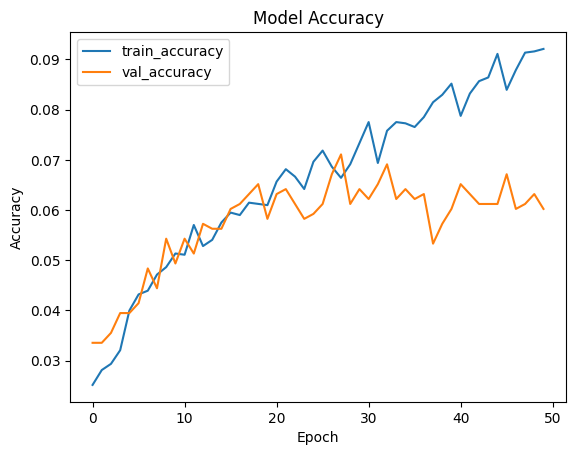

In [54]:
# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [55]:

# Make predictions on the test set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)


40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step


In [56]:

# Align predictions with the original DataFrame
predictions_df = pd.DataFrame({
    'Track': df['File Name'].iloc[test_idx],
    'Predicted Sub Genre': label_encoder_sub.inverse_transform(y_pred_classes)
})
predictions_df

,Track,Predicted Sub Genre
6222,Ken Elkinson - Wherever.M4a,filter house
3711,Ella Fitzgerald - Heat Wave.m4a,"jazz blues, jazz saxophone, jump blues, rhythm..."
3047,Daya - Talk.mp3,"british blues, power pop, pub rock, rockabilly"
3613,Efecto Pasillo - No Te Enamores.m4a,"indietronica, modern alternative rock, modern ..."
1575,Billy Joel - Uptown Girl.m4a,"filmi, tollywood"
...,...,...
57,5 Seconds Of Summer - Hey Everybody!.M4a,"hindustani classical, indian classical, indian..."
5491,Jim Brickman - Cloudy Day.Mp3,"chill pop, la pop"
2945,Dandy Livingstone - Big City.mp3,"k-pop, k-rap"
292,Alessandro Bazzani - Amp Flowers.Mp3,"latin pop, reggaeton, urbano latino"


In [57]:
from tensorflow.keras.models import load_model
# Save the model
model_path = '/content/drive/MyDrive/music/lstm_sub_genre.h5'
model.save(model_path)
print(f'Model saved to {model_path}')

Model saved to /content/drive/MyDrive/music/lstm_sub_genre.h5


# Train, test, Split with Key

In [58]:

# Split the data into training and testing sets
X_train_key, X_test_key, y_train_key, y_test_key, train_idx, test_idx = train_test_split(X, y_key, np.arange(len(y_key)), test_size=0.2, random_state=42)


In [59]:
# Define the LSTM model
num_classes = len(np.unique(y_key))
model = Sequential()
model.add(LSTM(128, input_shape=(X_train_key.shape[1], X_train_key.shape[2]), return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(64))
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# Train the model
history = model.fit(X_train_key, y_train_key, epochs=50, batch_size=32, validation_split=0.2)


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


127/127 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.0663 - loss: 3.1664 - val_accuracy: 0.1293 - val_loss: 3.0431
Epoch 2/50
127/127 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.1185 - loss: 3.0264 - val_accuracy: 0.1540 - val_loss: 2.9304
Epoch 3/50
127/127 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.1414 - loss: 2.9056 - val_accuracy: 0.1807 - val_loss: 2.7438
Epoch 4/50
127/127 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.1663 - loss: 2.7256 - val_accuracy: 0.2261 - val_loss: 2.5105
Epoch 5/50
127/127 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.2213 - loss: 2.5236 - val_accuracy: 0.2626 - val_loss: 2.3551
Epoch 6/50
127/127 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.2190 - loss: 2.3809 - val_accuracy: 0.2873 - val_loss: 2.2543
Epoch 7/50
127/127 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.2466 - loss: 2.3298 - val_accuracy: 0.2823 - val_loss: 2.1918
Epoch 8/50
127/127 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.2728 - loss: 2.2449 - val_accuracy: 0.2942 - v

In [60]:
# Evaluate the model
test_loss, test_acc = model.evaluate(X_test_key, y_test_key)
print(f'Test Accuracy: {test_acc}')

40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3569 - loss: 1.9204
Test Accuracy: 0.37805840373039246


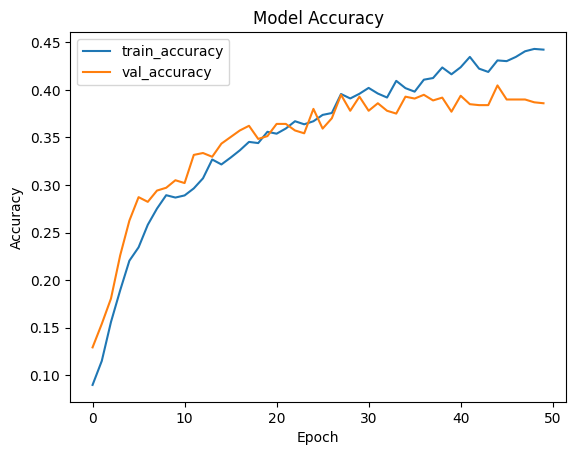

In [61]:
# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [62]:

# Make predictions on the test set
y_pred = model.predict(X_test_key)
y_pred_classes = np.argmax(y_pred, axis=1)


40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step


In [63]:

# Align predictions with the original DataFrame
predictions_df = pd.DataFrame({
    'Track': df['File Name'].iloc[test_idx],
    'Predicted Key': label_encoder_key.inverse_transform(y_pred_classes)
})
predictions_df

,Track,Predicted Key
6222,Ken Elkinson - Wherever.M4a,B Minor
3711,Ella Fitzgerald - Heat Wave.m4a,D Major
3047,Daya - Talk.mp3,C‚ôØ/D‚ô≠ Major
3613,Efecto Pasillo - No Te Enamores.m4a,A#/B‚ô≠ Major
1575,Billy Joel - Uptown Girl.m4a,G Minor
...,...,...
57,5 Seconds Of Summer - Hey Everybody!.M4a,D Major
5491,Jim Brickman - Cloudy Day.Mp3,E Major
2945,Dandy Livingstone - Big City.mp3,F Major
292,Alessandro Bazzani - Amp Flowers.Mp3,C‚ôØ/D‚ô≠ Minor


In [64]:
from tensorflow.keras.models import load_model
# Save the model
model_path = '/content/drive/MyDrive/music/lstm_key.h5'
model.save(model_path)
print(f'Model saved to {model_path}')

Model saved to /content/drive/MyDrive/music/lstm_key.h5


# Test the model with Sub Genre

In [65]:
from tensorflow.keras.models import load_model
# Save the model
model_path = '/content/drive/MyDrive/music/lstm_sub.h5'
model.save(model_path)
print(f'Model saved to {model_path}')

Model saved to /content/drive/MyDrive/music/lstm_sub.h5


In [67]:
import numpy as np
import pandas as pd
import librosa
from tensorflow.keras.models import load_model

# Load the trained model
lstm = load_model('/content/drive/MyDrive/music/lstm_sub.h5')  # Adjust path as needed

# Function to extract features from an audio file
def extract_features(audio_path):
    try:
        y, sr = librosa.load(audio_path, duration=30)
        mfccs = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13).T, axis=0)
        chroma = np.mean(librosa.feature.chroma_stft(y=y, sr=sr).T, axis=0)
        mel = np.mean(librosa.feature.melspectrogram(y=y, sr=sr).T, axis=0)
        return mfccs, chroma, mel
    except FileNotFoundError:
        print(f"File not found: {audio_path}")
        return None, None, None



# Load the Excel metadata
df = pd.read_excel('/content/drive/MyDrive/music/AI Music Files Metadata 10k(1).xlsx')


# Encode the genre labels
label_encoder_tempo = LabelEncoder()
df['Sub Genre'] = df['Sub Genre'].astype(str)
label_encoder_sub.fit(df['Sub Genre'])


LabelEncoder()

In [68]:

# List of new audio files
new_audio_files = [

    # Add more file paths as needed
    '/content/drive/MyDrive/music/test_music/A.P.J. - It Takes A Man To Teach A Woman How To Love.mp3',
    '/content/drive/MyDrive/music/test_music/Albert Ammons - Oh, Lady Be Good.Mp3',
    '/content/drive/MyDrive/music/test_music/Bo Diddley - Bo Diddley.M4a',
]


# Extract features from new audio files
features_list = []
for audio_path in new_audio_files:
    mfccs, chroma, mel = extract_features(audio_path)
    if mfccs is not None and chroma is not None and mel is not None:
        mfccs = np.pad(mfccs, (0, max(0, 100 - len(mfccs))), 'constant')[:100]
        chroma = np.pad(chroma, (0, max(0, 100 - len(chroma))), 'constant')[:100]
        mel = np.pad(mel, (0, max(0, 100 - len(mel))), 'constant')[:100]
        features = np.hstack([mfccs, chroma, mel])
        features_list.append(features)



<ipython-input-67-ed36f026a258>:12: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


In [69]:

# Convert to numpy array and reshape for LSTM
X_new = np.array(features_list).reshape((len(features_list), 1, -1))

# Make predictions
y_pred = lstm.predict(X_new)
y_pred_classes = np.argmax(y_pred, axis=1)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 296ms/step


In [70]:
# Map predicted labels back to genre names
predicted_genre = label_encoder_sub.inverse_transform(y_pred_classes)

# Create a DataFrame to store predictions
predictions_df = pd.DataFrame({
    'Track': [os.path.basename(file) for file in new_audio_files],
    'Predicted Sub Genre': predicted_genre
})

# Print predictions
predictions_df

,Track,Predicted Sub Genre
0,A.P.J. - It Takes A Man To Teach A Woman How T...,"acoustic pop, dance pop, neo mellow, pop"
1,"Albert Ammons - Oh, Lady Be Good.Mp3","acid jazz, italian lounge"
2,Bo Diddley - Bo Diddley.M4a,"acoustic pop, dance pop, neo mellow, pop"
